<a href="https://colab.research.google.com/github/ebnamusab/ML-in-image-processing/blob/main/41210101553_Ebna_Mosub_Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
from skimage import io
import matplotlib.pyplot as plt
import numpy as np


In [2]:
I = None

H = None # should contain height
W = None # should contain width
print("Height is", H)
print("Width is", W)

I = io.imread("/content/sample.jpeg")

# Get the height and width of the image
H, W, _ = I.shape

print("Height is", H)
print("Width is", W)

Height is None
Width is None
Height is 405
Width is 602


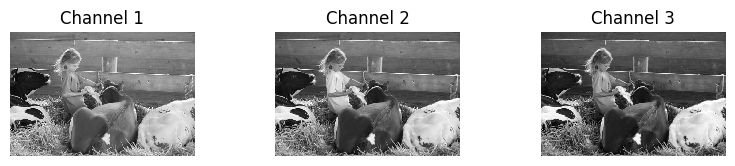

In [3]:
plt.rcParams["figure.figsize"] = (8, 2)
for i in range(3):
  plt.subplot(1, 3, i+1)
  io.imshow(I[:,:,i])
  plt.title('Channel {}'.format(i+1))
  plt.axis('off')

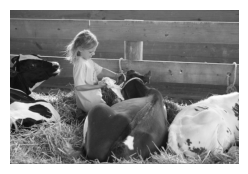

In [4]:
# Normalize the image so that the gray scales are between 0 and 1. Save it to I and display the image
I = None

### BEGIN SOLUTION

# Read the image
I = io.imread("/content/sample.jpeg", as_gray=True)

# Normalize the image
I = (I - I.min()) / (I.max() - I.min())

# Display the image
plt.imshow(I, cmap='gray')
plt.axis('off')
plt.show()
### END SOLUTION

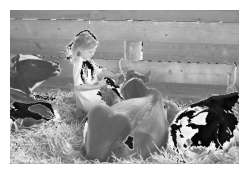

In [6]:
# Increase the brightness of the image without changing the contrast.
# Save the resulting image in I_bright and display it.(use stretching addition)
I_bright = None

### BEGIN SOLUTION
from skimage import io, util
# Step 1: Read the image
I = io.imread("/content/sample.jpeg", as_gray=True)

# Step 2: Normalize the image
I_normalized = (I - I.min()) / (I.max() - I.min())

# Step 3: Convert to 8-bit image
I_normalized = util.img_as_ubyte(I_normalized)

# Step 4: Increase brightness without changing contrast
brightness_factor = 50  # Adjust this value as needed
I_bright = I_normalized + brightness_factor

# Make sure values are in valid range [0, 255]
I_bright = util.img_as_ubyte(I_bright.clip(0, 255))

# Step 5: Save the brightened image to "sample_brightened.jpeg"
io.imsave("sample_brightened.jpeg", I_bright)

# Step 6: Display the brightened image
plt.imshow(I_bright, cmap='gray')
plt.axis('off')  # Hide axes
plt.show()

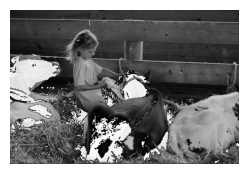

In [7]:
# Decrease the brightness of the image without changing the contrast.
# Save the resulting image in I_dark and display it.(use stretching Subtraction )
I_dark = None

### BEGIN SOLUTION
# Step 1: Read the image
I = io.imread("sample.jpeg", as_gray=True)

# Step 2: Normalize the image
I_normalized = (I - I.min()) / (I.max() - I.min())

# Step 3: Convert to 8-bit image
I_normalized = util.img_as_ubyte(I_normalized)

# Step 4: Decrease brightness without changing contrast
brightness_factor = 50  # Adjust this value as needed
I_dark = I_normalized - brightness_factor

# Make sure values are in valid range [0, 255]
I_dark = util.img_as_ubyte(I_dark.clip(0, 255))

# Step 5: Save the darkened image to "sample_darkened.jpeg"
io.imsave("sample_darkened.jpeg", I_dark)

# Step 6: Display the darkened image
plt.imshow(I_dark, cmap='gray')
plt.axis('off')  # Hide axes
plt.show()
### END SOLUTION

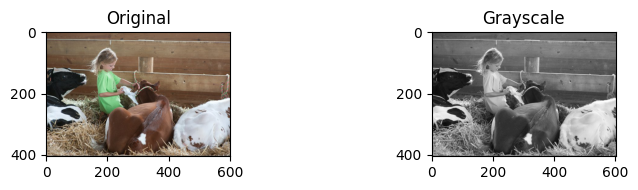

In [13]:
### BEGIN SOLUTION
import matplotlib.pyplot as plt
from skimage import io, color

# Step 1: Read the image
I = io.imread("/content/sample.jpeg")

# Check if image has an alpha channel (4th channel)
if I.shape[2] == 4:
    # Remove alpha channel if it exists
    I = I[:, :, :3]

# Step 2: Convert to grayscale
I_gray = color.rgb2gray(I)

# Create a figure with two subplots
fig, ax = plt.subplots(1, 2)

# Set titles for each subplot
ax[0].set_title("Original")
ax[1].set_title("Grayscale")

# Display the original and grayscale images
ax[0].imshow(I)
ax[1].imshow(I_gray, cmap=plt.cm.gray)

fig.tight_layout()
plt.show()



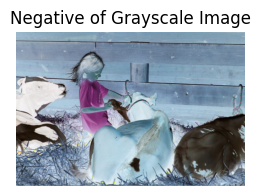

In [14]:
# Display the negative of the grayscale image

### BEGIN SOLUTION
import matplotlib.pyplot as plt
from skimage import io, color

# Function to handle potential errors during image loading
def load_and_convert_image(path):
    try:
        # Read the image in grayscale mode
        I = io.imread(path, as_gray=True)
    except (FileNotFoundError, IOError) as e:
        print(f"Error loading image: {e}")
        return None
    return I


# Calculate the negative of the grayscale image
I_negative = 1 - I

# Display the negative of the grayscale image
plt.imshow(I_negative, cmap='gray')
plt.title("Negative of Grayscale Image")
plt.axis('off')
plt.show()



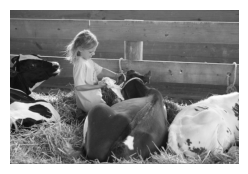

In [21]:
def piecewise_contrast_stretch(image, r1, r2, s1, s2):
    # Replace this with the actual implementation of the function
    return image

# Load the degraded image
I_degrade = io.imread("sample.jpeg", as_gray=True)

# Define the parameters for contrast stretching
r1 = 0.2  # Original min intensity (choose based on the degraded image)
r2 = 0.7  # Original max intensity (choose based on the degraded image)
s1 = 0.1  # Desired min intensity
s2 = 0.9  # Desired max intensity

# Perform piecewise linear contrast stretching
I_stretched = piecewise_contrast_stretch(I_degrade, r1, r2, s1, s2)

# Display the stretched image
plt.imshow(I_stretched, cmap='gray')
plt.axis('off')
plt.show()